In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # advanced graphs and plotting
#import statsmodels.formula.api as smf #model building
sns.set()
#from statsmodels.graphics.regressionplots import influence_plot #influence plot for understanding the significance of the predictors
import statsmodels.api as sm #general statistical model
from sklearn.linear_model import LogisticRegression

In [136]:
x=pd.read_csv("/content/drive/MyDrive/Assignments/LOGISTIC REGRESSION/Titanic_train.csv")


In [175]:
y=pd.read_csv("/content/drive/MyDrive/Assignments/LOGISTIC REGRESSION/Titanic_test.csv")

* Loaded both the datasets and we are going to use data the copy-dataset[the train data] for all the operations until model bulding

In [138]:
x.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA


In [139]:
data=x.copy()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* as per the data the we need to predict whether the person survived or not

In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* Age has some null values in it we can do mean imputation for that, because we cant drop the null values as they are nearly 20%(~19.8%) of the data, already given training data is less and we cant reduce this more

In [141]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* Name and Ticket doesnt have any significance in predicting whether they survved or not so dropping them both off

In [142]:
data1=data.drop(columns=["Name","Ticket"],axis=1)
data1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [143]:
#data1["Cabin"].count_values
unique_count = data1["Cabin"].nunique()
print(unique_count)

unique_values = data1["Cabin"].unique()
print("Unique values:", unique_values)

147
Unique values: [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


* thought of encoding these unique values but they are many and encoding these many into each singular columns would increase the computation time

In [144]:
df_dummies = pd.get_dummies(data1["Sex"], prefix='sex')
data1 = pd.concat([data1, df_dummies], axis=1)

# Drop the original categorical feature
data1.drop('Sex', axis=1, inplace=True)

data1.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,sex_female,sex_male
0,1,0,3,22.0,1,0,7.2500,NaN,S,False,True
1,2,1,1,38.0,1,0,71.2833,C85,C,True,False
2,3,1,3,26.0,0,0,7.9250,NaN,S,True,False
3,4,1,1,35.0,1,0,53.1000,C123,S,True,False
4,5,0,3,35.0,0,0,8.0500,NaN,S,False,True


In [145]:
data_new = data1.loc[:, ~data1.T.duplicated()]
data_new.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,sex_female,sex_male
0,1,0,3,22.0,1,0,7.2500,NaN,S,False,True
1,2,1,1,38.0,1,0,71.2833,C85,C,True,False
2,3,1,3,26.0,0,0,7.9250,NaN,S,True,False
3,4,1,1,35.0,1,0,53.1000,C123,S,True,False
4,5,0,3,35.0,0,0,8.0500,NaN,S,False,True


In [146]:
#renaming the feature names
data_new=data_new.rename({'sex_female': 'female','sex_male':'male'},axis=1)
data_new.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,female,male
0,1,0,3,22.0,1,0,7.2500,NaN,S,False,True
1,2,1,1,38.0,1,0,71.2833,C85,C,True,False
2,3,1,3,26.0,0,0,7.9250,NaN,S,True,False
3,4,1,1,35.0,1,0,53.1000,C123,S,True,False
4,5,0,3,35.0,0,0,8.0500,NaN,S,False,True


In [147]:
data_new["female"]=data_new["female"].astype(int)
data_new["male"]=data_new["male"].astype(int)
data_new.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,female,male
0,1,0,3,22.0,1,0,7.2500,NaN,S,0,1
1,2,1,1,38.0,1,0,71.2833,C85,C,1,0
2,3,1,3,26.0,0,0,7.9250,NaN,S,1,0
3,4,1,1,35.0,1,0,53.1000,C123,S,1,0
4,5,0,3,35.0,0,0,8.0500,NaN,S,0,1


* encoding intrepretations
- 0 is False and 1 id True

In [148]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Cabin        204 non-null    object 
 8   Embarked     889 non-null    object 
 9   female       891 non-null    int64  
 10  male         891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB


In [149]:
df1_dummies = pd.get_dummies(data_new["Embarked"], prefix='Embarked')
data_new = pd.concat([data_new, df1_dummies], axis=1)

# Drop the original categorical feature
data_new.drop('Embarked', axis=1, inplace=True)

data_new.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,female,male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,NaN,0,1,False,False,True
1,2,1,1,38.0,1,0,71.2833,C85,1,0,True,False,False
2,3,1,3,26.0,0,0,7.9250,NaN,1,0,False,False,True
3,4,1,1,35.0,1,0,53.1000,C123,1,0,False,False,True
4,5,0,3,35.0,0,0,8.0500,NaN,0,1,False,False,True


In [150]:
data2 = data_new.loc[:, ~data_new.T.duplicated()]
data2.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,female,male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,NaN,0,1,False,False,True
1,2,1,1,38.0,1,0,71.2833,C85,1,0,True,False,False
2,3,1,3,26.0,0,0,7.9250,NaN,1,0,False,False,True
3,4,1,1,35.0,1,0,53.1000,C123,1,0,False,False,True
4,5,0,3,35.0,0,0,8.0500,NaN,0,1,False,False,True


In [151]:
import warnings
warnings.filterwarnings("ignore") #just to ignore any warnings


data2["Embarked_C"]=data2["Embarked_C"].astype(int)
data2["Embarked_Q"]=data2["Embarked_Q"].astype(int)
data2["Embarked_S"]=data2["Embarked_S"].astype(int)
data2.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,female,male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,NaN,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,C85,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,NaN,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,C123,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,NaN,0,1,0,0,1


* lets also drop the cabin column as they are too many entries in it and it is kind of insignificant for us to predict the survivability of the passengers

In [152]:
data3=data2.drop(["Cabin"],axis=1)
data3.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [153]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   female       891 non-null    int64  
 8   male         891 non-null    int64  
 9   Embarked_C   891 non-null    int64  
 10  Embarked_Q   891 non-null    int64  
 11  Embarked_S   891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 83.7 KB


Know there are no categorical data present all the previous categorical data such as sex, embarked have been made into numerical values using one hot encoding and tranformed them

* Know we can have visualizations with data 3 and before taking any action against the null values in Age feature

## Visualizations

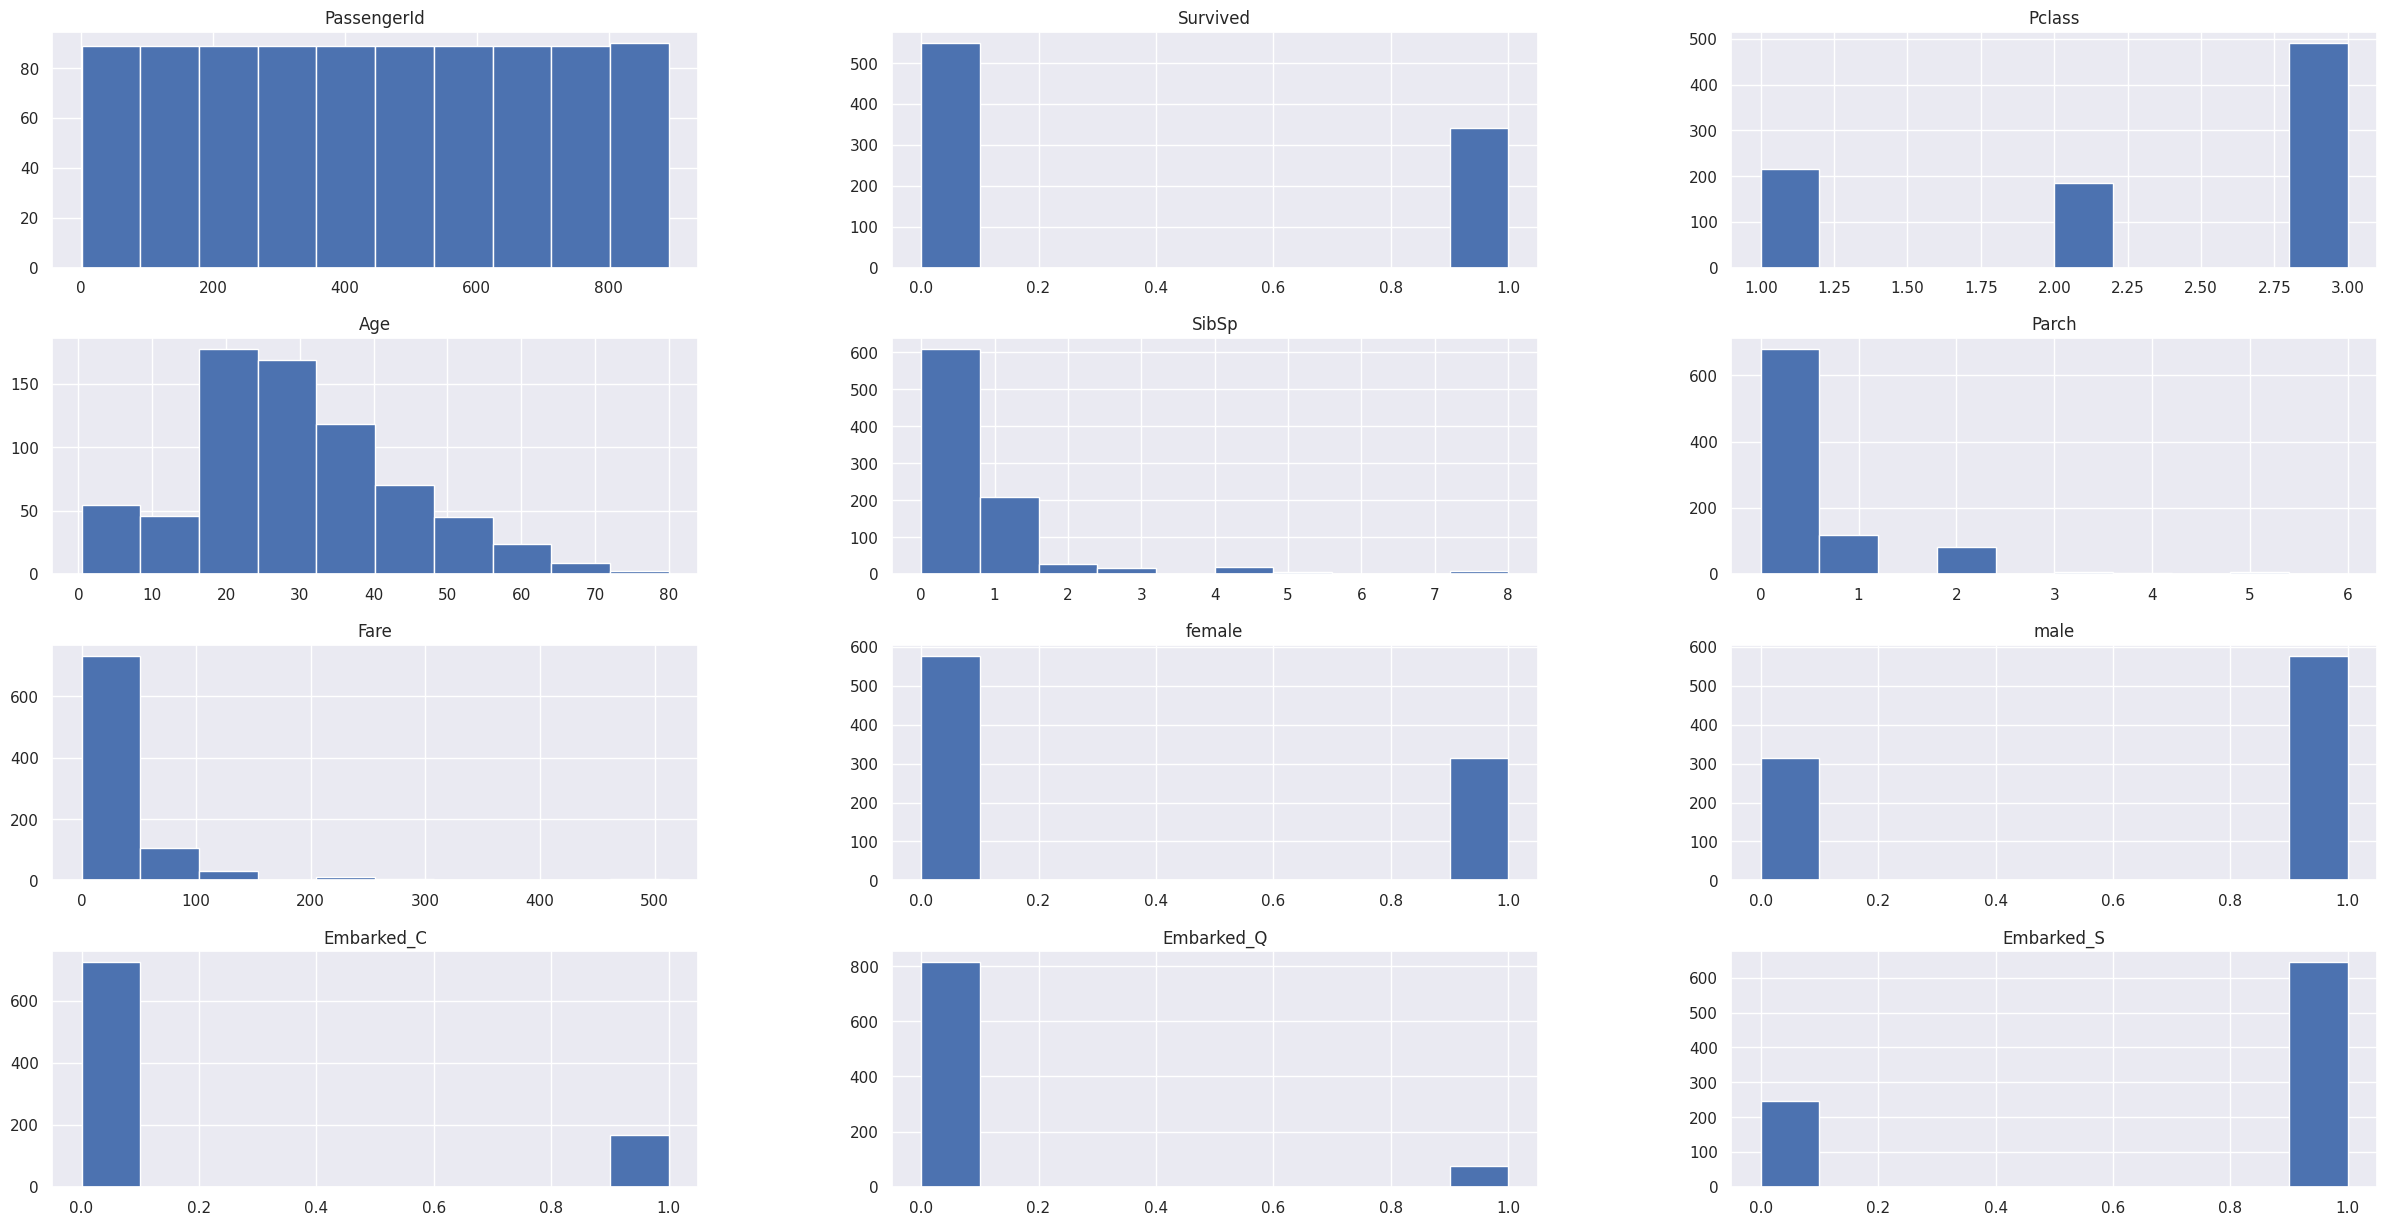

In [154]:
data3.hist(figsize=(30,15))
plt.show()

From the histogram we can say:
* the features such as "Survived", "Parch", "Pclass", "embarked_C","Embarked_S","Embarked_Q", "male","female" have turned into bar plots visually but in hypothetically they are histograms
* And the feature Age with null values, even show a slight skewness in the data distribution
*  fare is to be equally distributed with very less skewness

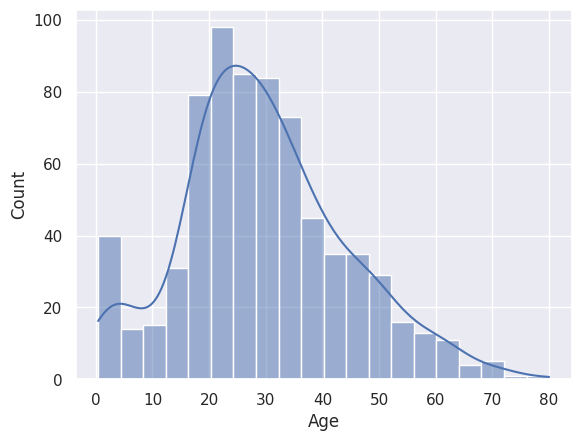

In [155]:
sns.histplot(data3['Age'].dropna(), kde=True)
plt.show()
# To get a clear understanding of the graph

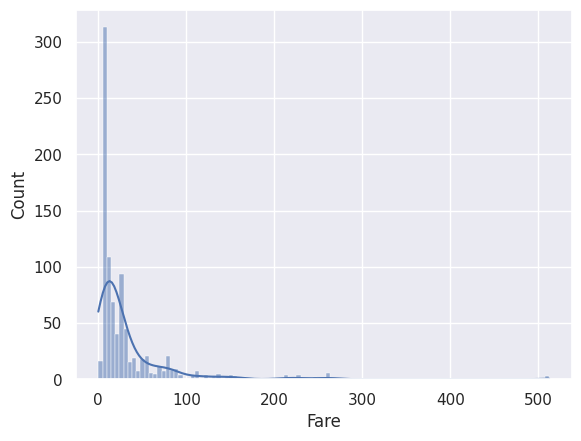

In [156]:
sns.histplot(data3['Fare'].dropna(), kde=True)
plt.show()

<Axes: xlabel='Survived', ylabel='Age'>

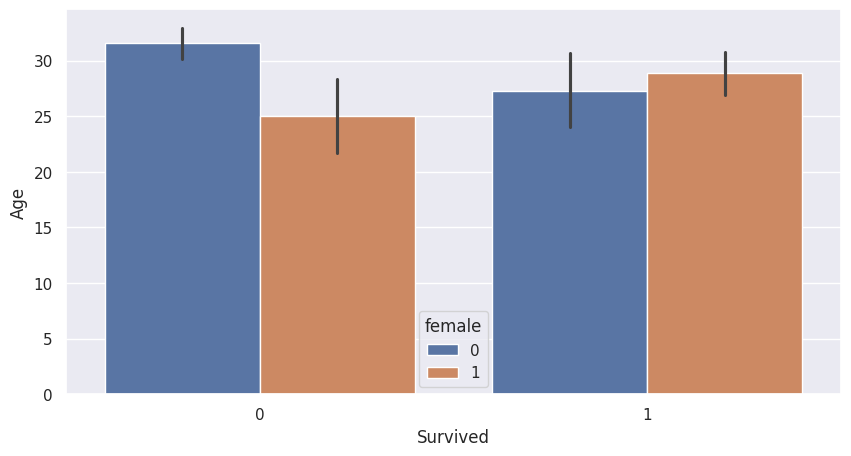

In [157]:
plt.figure(figsize=(10,5))
sns.barplot(x="Survived",y="Age",data=data3,hue="female")

<Axes: xlabel='Survived', ylabel='Age'>

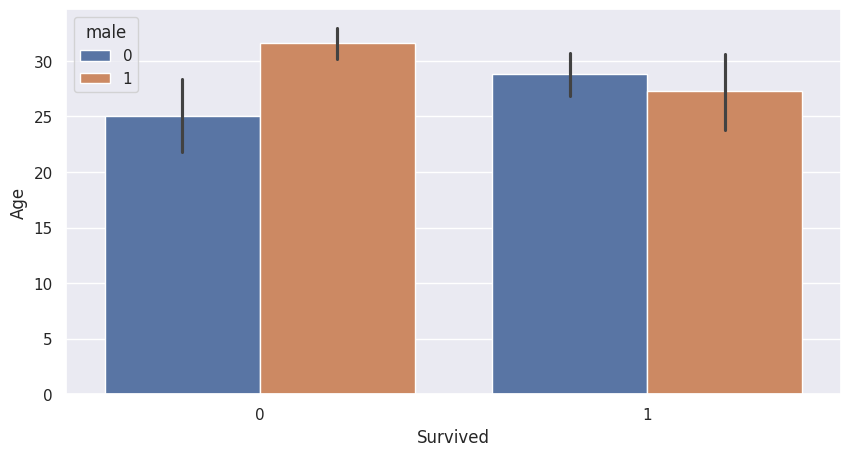

In [158]:
plt.figure(figsize=(10,5))
sns.barplot(x="Survived",y="Age",data=data3,hue="male")

<Axes: xlabel='Survived', ylabel='female'>

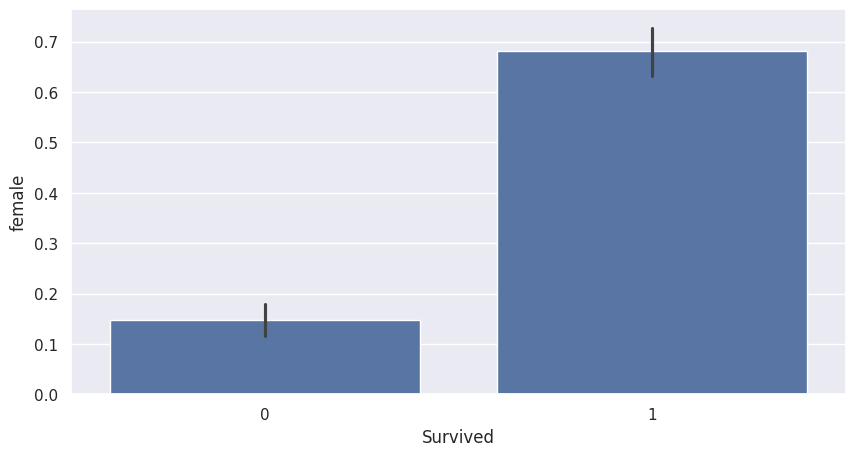

In [159]:
plt.figure(figsize=(10,5))
sns.barplot(x="Survived",y="female",data=data3)

<Axes: xlabel='Survived', ylabel='male'>

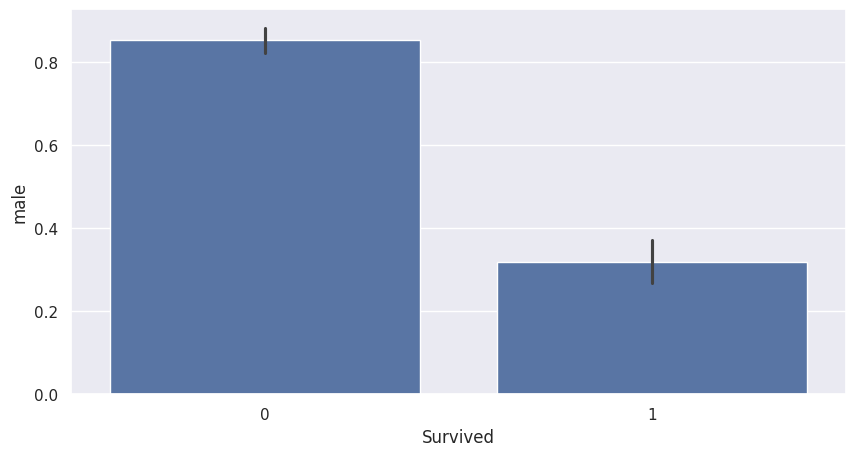

In [160]:
plt.figure(figsize=(10,5))
sns.barplot(x="Survived",y="male",data=data3)

* The inferences we got from the bar plots says that women were saved in more number than men, even though they were less in number most of the female passengers were saved

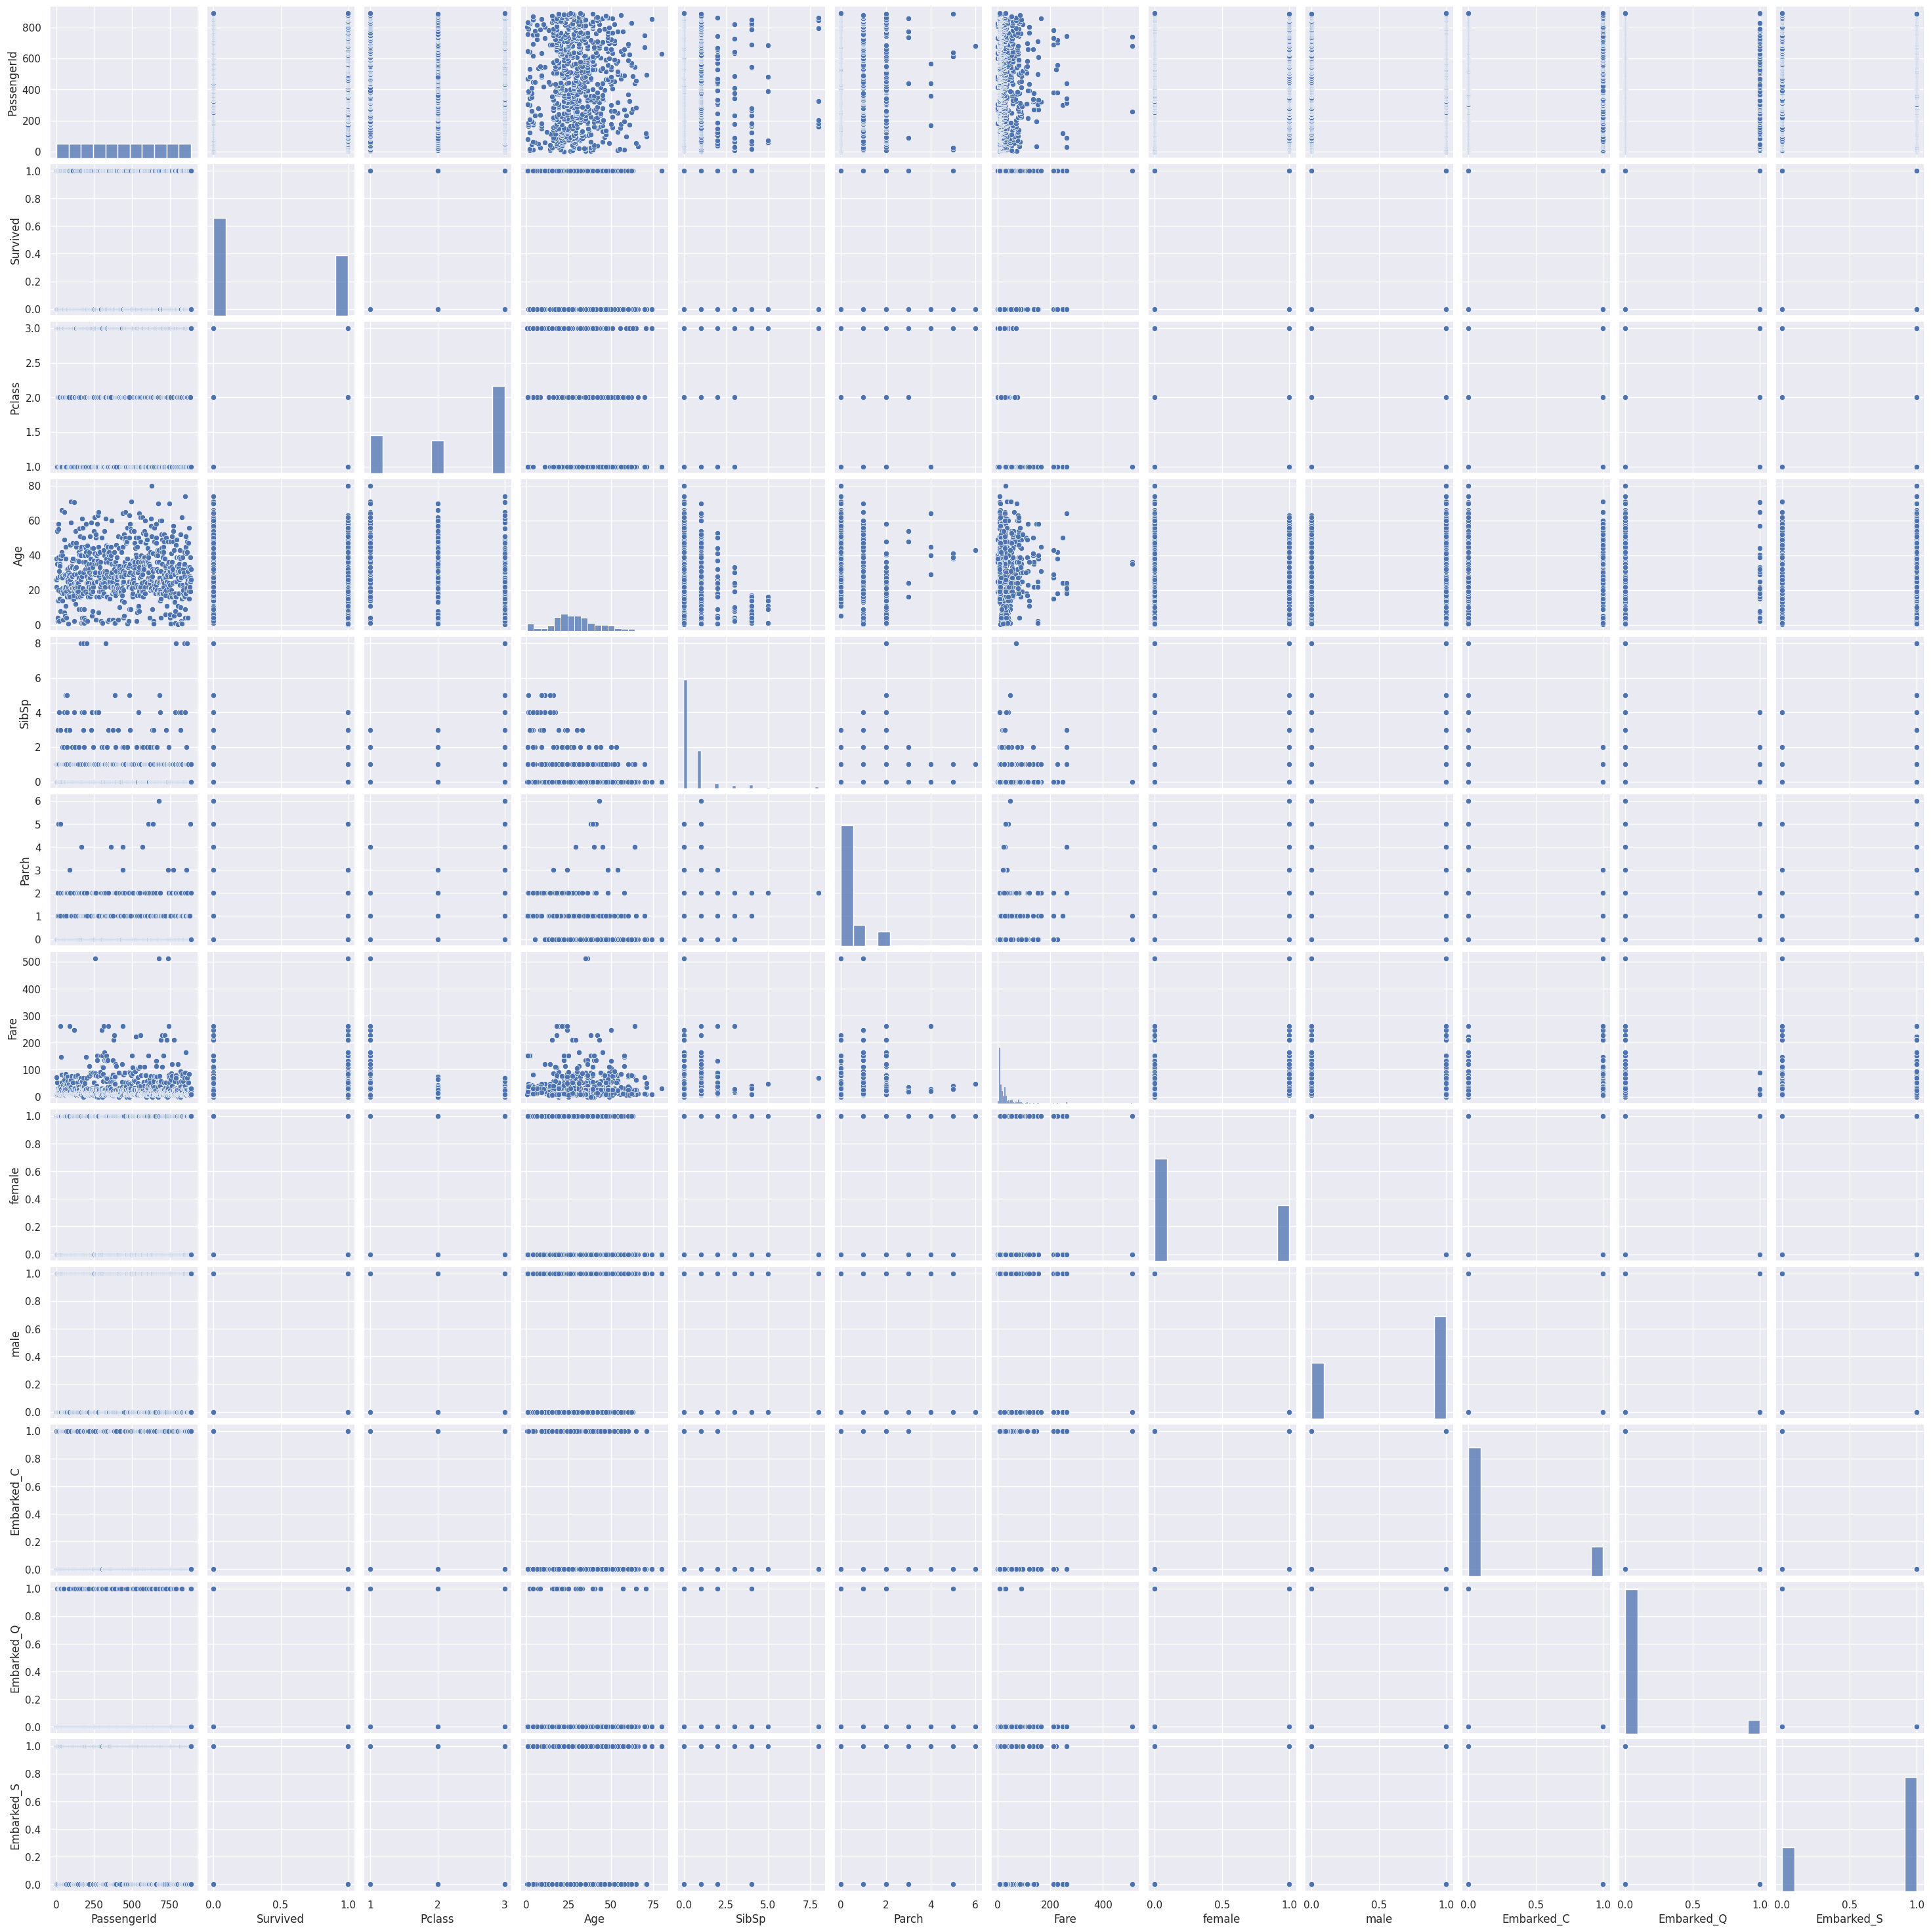

In [161]:
sns.pairplot(data3)
plt.show()

* As per the pairplot there are no, features that are strngly related to each other, so that if one feature is completely removed and others features have no effect over predicting the nature of survival( whether survived or not)

<Axes: >

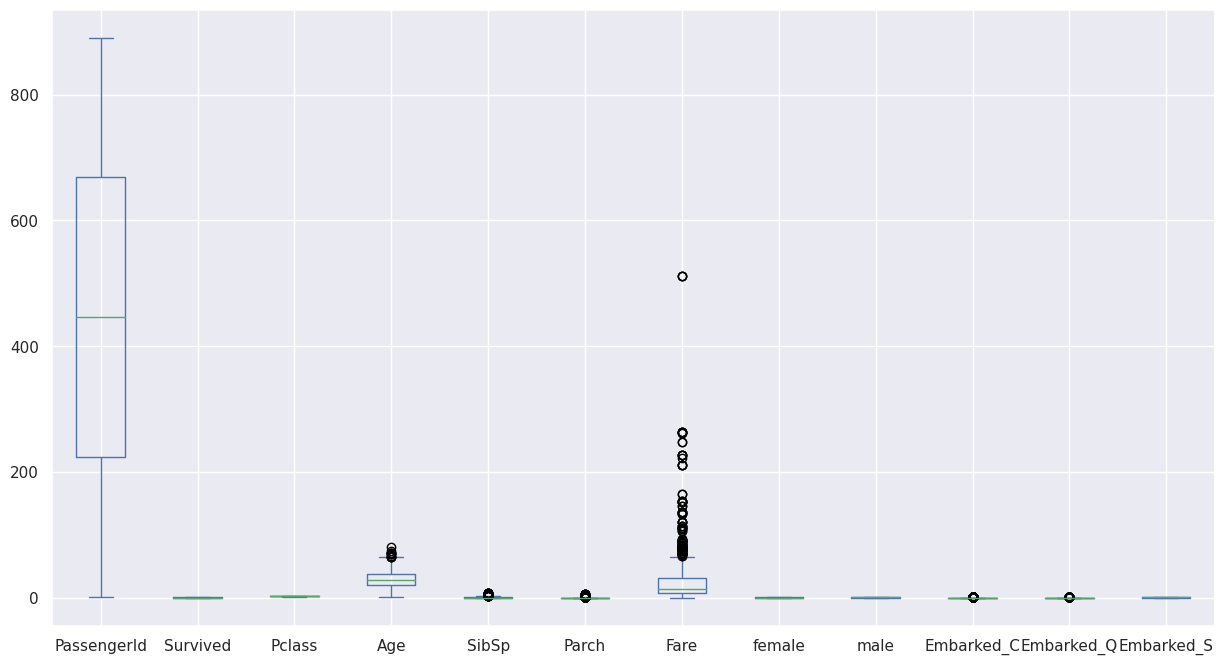

In [166]:
data3.plot(kind='box',figsize=(15,8))

the fare has some, many outliers that are actually the prices so there is no reason to deal with outliers

# DATA PRE - PROCESSING

- now lets impute the null values present in feature Age

In [167]:
#FINDING NULL VALUES
null_values=data3.isnull().sum()
null_values

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
female           0
male             0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [168]:
data4=data3.copy()

data4["Age"].fillna(data4["Age"].mean(),inplace=True)
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   female       891 non-null    int64  
 8   male         891 non-null    int64  
 9   Embarked_C   891 non-null    int64  
 10  Embarked_Q   891 non-null    int64  
 11  Embarked_S   891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 83.7 KB


In [169]:
data5=data3.copy()
data5["Age"].fillna(data5["Age"].median(),inplace=True)
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   female       891 non-null    int64  
 8   male         891 non-null    int64  
 9   Embarked_C   891 non-null    int64  
 10  Embarked_Q   891 non-null    int64  
 11  Embarked_S   891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 83.7 KB


In [170]:
data3["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [171]:
data4["Age"].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

* not major changes in the statistcal summary so imputating the null values with the mean method was queit efficient

In [172]:
data5["Age"].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

the standard deviation has been same for both mean and median imputation methods

* data4 is the training data with all the needed changes and data pre processings

In [173]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   female       891 non-null    int64  
 8   male         891 non-null    int64  
 9   Embarked_C   891 non-null    int64  
 10  Embarked_Q   891 non-null    int64  
 11  Embarked_S   891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 83.7 KB


In [177]:
y.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# MODEL BUILDING

In [178]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = data4.drop(['Survived', 'PassengerId'], axis=1)
Y = data4['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

## MODEL EVALUTAION

In [180]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')



Accuracy: 0.8044692737430168
Precision: 0.7746478873239436
Recall: 0.7432432432432432
F1 Score: 0.7586206896551724
ROC AUC Score: 0.8819819819819821


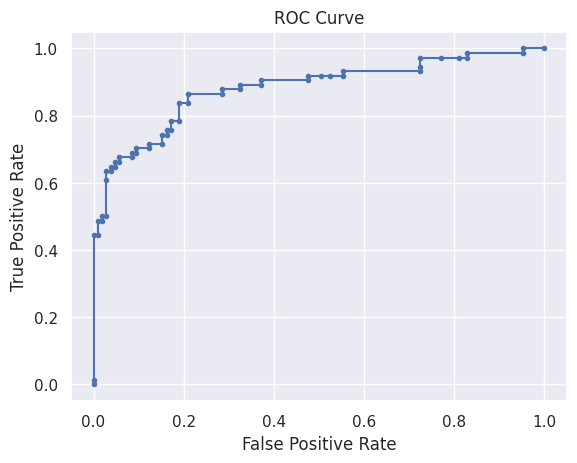

In [181]:
#ROC AUC CURVE

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [184]:
from sklearn.metrics import classification_report  as cr
print(cr(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



In [185]:
coeffs = pd.DataFrame(model.coef_.T, index=X.columns, columns=['Coefficient'])
print(coeffs)


            Coefficient
Pclass        -0.928219
Age           -0.030435
SibSp         -0.303870
Parch         -0.102217
Fare           0.002543
female         1.581224
male          -1.043286
Embarked_C     0.255011
Embarked_Q     0.143077
Embarked_S    -0.250678


so these coefficients can be interpretated as
* Age (-0.03):

  -or each additional year of age, the log-odds of survival decrease by 0.03.

  -or for increase in each additional year the survival rate decreases by 3%

* Fare (0.002):

  -For each additional unit of fare paid, the log-odds of survival increase by 0.002.
  - or for increase in the fare there is a very sligt increase in the surival rate

* thus if the coefficients are negative in nature then, with increase in te input feature there will be an decrease in the surival rate(predicting varible/ target variable)
* and if the coefficients are positive in nature then, with increase in the input feature increases the survival rate(predicting variable / target variable)

In [186]:
#LETS SAVE THE MODEL
import pickle
filename="survival_prediction.pkl"
pickle.dump(model,open(filename,"wb"))

In [188]:
from google.colab import files
files.download("survival_prediction.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [189]:
#lets save it in ".sav" format
import joblib

# Save the model to disk
filename = 'survival_pred.sav'
joblib.dump(model, filename)

['survival_pred.sav']

In [190]:
from google.colab import files
files.download("survival_pred.sav")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## InterView Questions

1) What is the difference between precision and recall?

* Precision is the ratio of true positive predictions to the total positive predictions made by the model.
    - Precision= (TP+FP)/TP


* Recall is the ratio of true positive predictions to the total actual positives in the data.
    - Recall= (TP+FN)/TP



2) What is cross-validation and why is it important in binary classification?

- Cross-validation is a technique to assess the generalizability of a model by dividing the data into multiple subsets, training the model on some subsets, and validating it on others.
* It helps in ensuring that the model performs well on unseen data and reduces the risk of overfitting.

there are many cross validation techniques but there are some that are mostly used
- Train Test Split Method
- K- Fold Cross Validation
- Leave-One-Out Cross-Validation (LOOCV)

